In [2]:
import numpy as np
import pandas as pd
import sortedcontainers as SortedList
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle

In [20]:
count=0

#label_map=['0','1','2','3','4','5','6','7','8','9']
img_matrix=[]
expr=[]
img_norm_global=[]
img_vec_=[]

for line in open('Classified Data'):     #file consist of 35887 entry, but 35875 not zero max of pixel non zero each entry has 1 digit for emotion then and array of 2304 pixel intensity (48*48) and 1 text for name (traning/test) not necessary here
    count=count+1
    #print(count)

        
    list_=line.replace('\n',' ').replace(',',' ').strip().split(' ')
    #print(list_)
    #if (count<5):
        
    #    print(len(list_))
    #    pass
    #txt=list_[len(list_)-1]
    if(count>1):
        image_vec=np.array((list_[1:len(list_)-1]))   #list string
        image_vec_i=[float(i) for i in image_vec]   # list to integer
    
        if(len(list_)==12 and np.max(image_vec_i)!=0 and count>1):     #28*28+1
            
            expr_=int(list_[11])
            expr.append(expr_)
        
            image_vec_i=np.array(image_vec_i)
            img_vec_.append(image_vec_i)
            image_vec_i_norm=np.array(image_vec_i)   #/255.0                              #np.max(image_vec_i)
            img_matrix.append(image_vec_i_norm)             #for solving
            #len_N=int(np.sqrt(np.shape(image_vec_i)[0]))
            #img=image_vec_i.reshape(len_N,len_N)
            #img_norm=img/255.0                              #(np.max(img))
            #print(np.max(img))
            #img_norm_global.append(img_norm)     #for plotting figs
        
        


In [21]:
np.shape(img_matrix)

(1000, 10)

In [22]:

N=np.shape(img_matrix)[0]
D=np.shape(img_matrix)[1]

YY=np.random.randn(N)
XX=np.zeros((N,D))

limit_=N                       #incase don't want all 42000 samples, change it to other number than N
        
for i in range(limit_):
    YY[i]=expr[i]    #expressions
    for j in range(D):
                
        XX[i,j]=img_matrix[i][j]     #pixels into XX
 
       


In [30]:
Xtrain=XX[0:500,:]
Ytrain=YY[0:500]

Xtest=XX[500:1000,:]
Ytest=YY[500:1000]

Y_pred=np.zeros(500)
#print(Y_pred)

dist_list=[]
j_list=[]
i_list=[]
y_list=[]
K_list=[]
count_list=[]
accuracy_vec=[]
accuracy_vec2=[]

Xnotbase=Xtest          #Xtrain
Ynotbase=Ytest         #Ytrain

K=40
#K_K=np.array(range([K])

for i_k in range(K):   #range(K):    K_K
    print('i_k',i_k)

    for i,x in enumerate(Xnotbase):   #pick a point loop over all domain for distances
        #print('i',i)
        #print(i,j)
        for j,xt in enumerate(Xtrain):
            dis=np.dot((x-xt),(x-xt))
            dist_list.append(dis)
            #j_list.append(j)
            #i_list.append(i)
            y_list.append(Ytrain[j])
            #print(i,j,dis,Ytrain[j])
        #print('\n')   
        #zipped=zip(i_list,j_list,dist_list,y_list)   
        zipped=zip(dist_list,y_list)  
        #print('*********')

        zipped_sorted=sorted(zipped, key=lambda xx: xx[0])
        #print('\n')
        #print(zipped_sorted)
        #print('\n')
        #print('----------')
        for ii in range(i_k+1):
            #if (ii==K):
            #print(i,ii,zipped_sorted[ii],zipped_sorted[ii][1])
            K_list.append(int(zipped_sorted[ii][1]))
        #print(K_list)
        #print('%%%%%%%%%%%%%%%%%%')
        #print(K,i,j_list[K],zipped_sorted[K])
        max_count=0
        #for iii in range(10):
        for iii in K_list:
            #print(iii,K_list.count(iii))
            if(K_list.count(iii)>max_count):
                max_count=K_list.count(iii)
                max_int=iii
        #print('++')
        #print(max_int,max_count) 
        Y_pred[i]=max_int
        dist_list=[]
        j_list=[]   
        i_list=[]
        y_list=[]
        K_list=[]
        count_list=[]
        #print('----------')
        #print('----------')
        #print('\n')
    #print(Y_pred)
    accuracy=np.mean(Y_pred==Ynotbase) 
    accuracy_vec2.append(accuracy)
    #Y_pred=np.zeros(500)
    #print(accuracy)
    

i_k 0
i_k 1
i_k 2
i_k 3
i_k 4
i_k 5
i_k 6
i_k 7
i_k 8
i_k 9
i_k 10
i_k 11
i_k 12
i_k 13
i_k 14
i_k 15
i_k 16
i_k 17
i_k 18
i_k 19
i_k 20
i_k 21
i_k 22
i_k 23
i_k 24
i_k 25
i_k 26
i_k 27
i_k 28
i_k 29
i_k 30
i_k 31
i_k 32
i_k 33
i_k 34
i_k 35
i_k 36
i_k 37
i_k 38
i_k 39


In [17]:
print(Xtrain)

[[0.91391733 1.16207271 0.56794585 ... 0.87942209 1.23140944 1.        ]
 [0.6356319  1.00372163 0.53534235 ... 0.62155222 1.4927016  0.        ]
 [0.72135981 1.20149262 0.92198973 ... 0.95787702 1.28559679 0.        ]
 ...
 [0.8726894  1.53173392 0.85128922 ... 1.22727063 1.460254   0.        ]
 [1.17166201 1.35742736 0.6529191  ... 1.49956533 1.45096636 1.        ]
 [0.7434139  1.34653707 1.00811523 ... 0.91078265 1.5886097  0.        ]]


In [19]:
print(Xtest)

[[0.5707578  0.79897564 0.69913596 ... 1.08558563 1.67803922 1.        ]
 [0.71311797 1.21664681 0.69904783 ... 1.05733406 1.23502725 0.        ]
 [1.29650806 1.02050117 0.63923511 ... 1.58867497 1.26822477 1.        ]
 ...
 [1.13546983 0.98246233 0.78190516 ... 0.91919143 1.385504   1.        ]
 [1.08489449 0.86176917 0.40715771 ... 1.27745578 1.18806277 1.        ]
 [0.83745954 0.96118352 0.41700599 ... 1.25718998 1.36483726 1.        ]]


In [31]:
accuracy_test=accuracy_vec2
#print(accuracy_train,accuracy_test)

(0.9, 1.01)

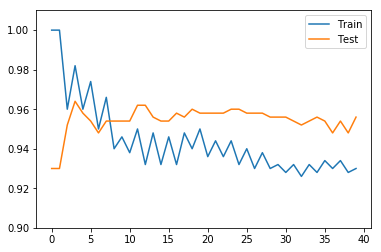

In [34]:
plt.plot(np.array(range(K)),accuracy_train,label='Train')
plt.plot(np.array(range(K)),accuracy_test,label='Test')
plt.legend()
plt.ylim(0.9,1.01)

In [75]:
zipped_sorted[0:3]

[(9, 0.0, 3.0), (5, 84.99800076893503, 0.0), (2, 98.77390234525183, 1.0)]

In [ ]:
K=1

for i in range(limit_):
    for j in range(D):
        
        
        
        



In [24]:
np.shape(XX)

(42000, 784)

[ 5876 34857 21430 15338 36282 24155 18270 29409 26654   578]


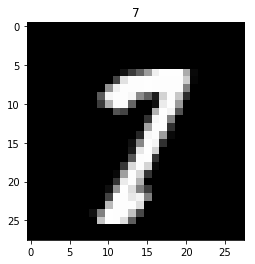

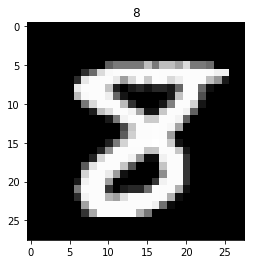

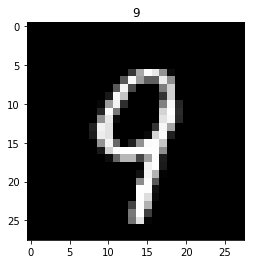

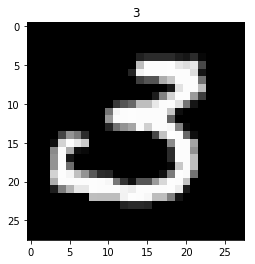

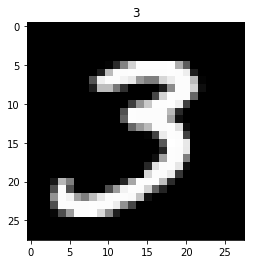

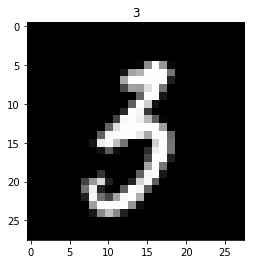

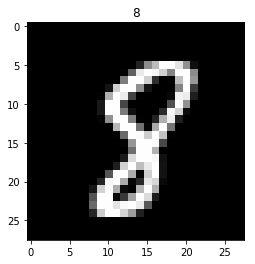

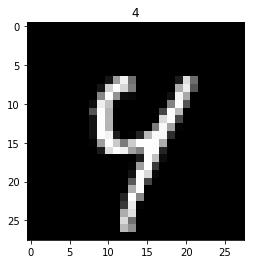

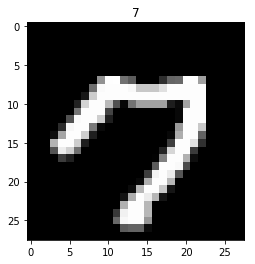

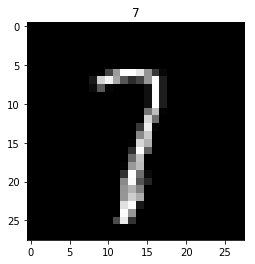

In [27]:
#random sample plotting
N_samples=np.shape(YY)[0]

picks=np.random.choice(N_samples, 10)
print(picks)
for i in picks:
    plt.figure(figsize=(4,4))
    plt.imshow(img_norm_global[i],cmap='gray')
    plt.title(label_map[expr[i]])
    plt.show()

In [ ]:
K=5



